In [60]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings


In [19]:
#load the dataset
df = pd.read_csv('data/dataset.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
#selecting X and y
X = df.drop('math score', axis=1)
y = df['math score']


In [34]:
#create columns transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),

        ("StanderdScaler", num_transformer, num_features)
    ]
)


In [35]:
X = preprocessor.fit_transform(X)

In [36]:
X.shape

(1000, 19)

In [38]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [48]:
#create an evaluation function for all metrics after model training

def evaluate_model(y_true, y_preds):
    mae= mean_absolute_error(y_true, y_preds)
    mse= mean_squared_error(y_true, y_preds)
    rmse= np.sqrt(mean_squared_error(y_true, y_preds))
    r2= r2_score(y_true, y_preds)
    return mae, rmse, r2

In [50]:
#list of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "XGBRegressor": XGBRegressor()
}


model_list = []
r2_list = []

#fitting the model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #predicting the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate the model
    model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)


    # append the model name and r2 score to the list
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    #print the scores
    print("Model performance on training data")
    print("Train MAE: {:.4f}".format(model_train_mae))
    print("Train RMSE: {:.4f}".format(model_train_rmse))
    print("Train R2: {:.4f}".format(model_train_r2))
    print("----------------------------------------")
    print("Model performance on testing data")
    print("Test MAE: {:.4f}".format(model_test_mae))
    print("Test RMSE: {:.4f}".format(model_test_rmse))
    print("Test R2: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")






LinearRegression
Model performance on training data
Train MAE: 4.2545
Train RMSE: 5.3250
Train R2: 0.8760
----------------------------------------
Model performance on testing data
Test MAE: 4.1931
Test RMSE: 5.3312
Test R2: 0.8776


Ridge
Model performance on training data
Train MAE: 4.2532
Train RMSE: 5.3252
Train R2: 0.8760
----------------------------------------
Model performance on testing data
Test MAE: 4.1930
Test RMSE: 5.3284
Test R2: 0.8777


Lasso
Model performance on training data
Train MAE: 5.1811
Train RMSE: 6.5972
Train R2: 0.8096
----------------------------------------
Model performance on testing data
Test MAE: 4.9571
Test RMSE: 6.1312
Test R2: 0.8381


KNeighborsRegressor
Model performance on training data
Train MAE: 4.6455
Train RMSE: 5.8771
Train R2: 0.8489
----------------------------------------
Model performance on testing data
Test MAE: 5.5650
Test RMSE: 6.8685
Test R2: 0.7968


SVR
Model performance on training data
Train MAE: 4.9711
Train RMSE: 6.9592
Train R

In [54]:
#create a dataframe of model and r2 score and sort according to r2 score
model_r2_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['model', 'r2_score']).sort_values(by='r2_score', ascending=False)



In [55]:
model_r2_df

,model,r2_score
1,Ridge,0.877720
0,LinearRegression,0.877594
8,GradientBoostingRegressor,0.868686
9,CatBoostRegressor,0.860175
6,RandomForestRegressor,0.858975
7,AdaBoostRegressor,0.852693
2,Lasso,0.838098
10,XGBRegressor,0.834526
4,SVR,0.812521
3,KNeighborsRegressor,0.796824


## **Linear Regression**


In [58]:
#check the model ofthe accuracy
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model: %.2f" %score)

Accuracy of the model: 87.76


Text(0, 0.5, 'Predicted')

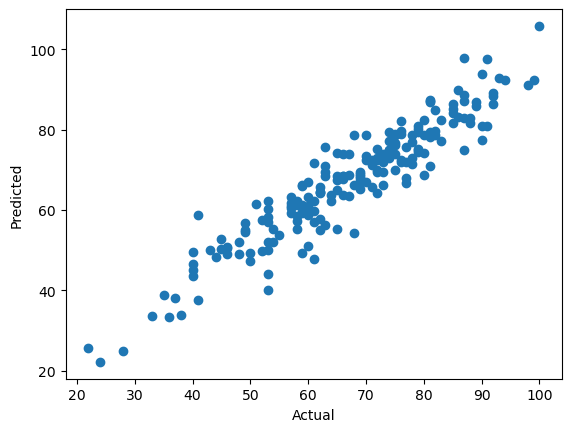

In [63]:
#ploting the y_pred and y_test values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

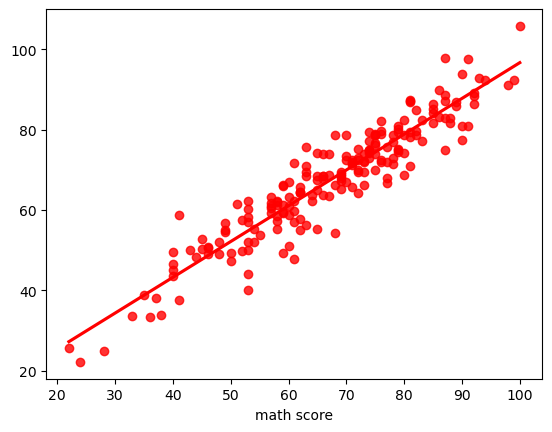

In [62]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [64]:
#predicted value with respect to actual value
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
131,53,40.097238,12.902762
203,57,61.819571,-4.819571
50,53,62.321084,-9.321084
585,65,68.497220,-3.497220
138,59,59.557047,-0.557047
...,...,...,...
79,62,64.591809,-2.591809
177,71,65.829884,5.170116
657,69,69.457313,-0.457313
210,80,78.554410,1.445590
